#Create Gene Interaction Network

This script creates a dictionary of gene interactions from the information in human net. It also performs some brief analysis for an overview of the data.

In [3]:
%pylab inline
import pandas as pd
import numpy as np
import os
import sklearn as sk
from sklearn.cluster import AffinityPropagation
from sklearn import datasets
from sklearn import metrics
from multiprocessing import Pool
import pickle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Getting Gene Interactions from HumanNet

In [ ]:
edges = {}
keys = []
with open('HumanNet.v1.join.txt', 'r') as human_net:
    for line in human_net:
        c = [x for x in line.strip().split("\t")]
        one = int(c[0])
        two = int(c[1])
        if one in keys:
            edges[one].append(two)
        else:
            edges[one] = [two]
            keys.append(one)
        if two in keys:
            edges[two].append(one)
        else:
            edges[two] = [one]
            keys.append(two)

In [4]:
pickle.dump(edges, open("edges.p", 'wb'))

NameError: name 'edges' is not defined

In [6]:
edges = pickle.load(open("../data_frames/edges.p", 'rb'))

Messing around to better understand the properties of HumanNet

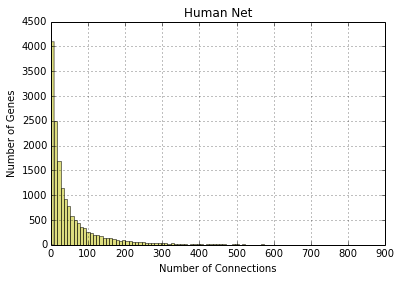

In [10]:
connect = []
keys = edges.keys()
for key in keys:
    connect.append(len(edges[key]))
connections = {"Gene_id": pd.Series(keys),
               "Number_of_Connections": pd.Series(connect)}
connectionsdf = pd.DataFrame(connections)
ax = connectionsdf['Number_of_Connections'].hist(bins=100, color='y', alpha=0.5)
ax.set_xlabel("Number of Connections")
ax.set_ylabel("Number of Genes")
ax.set_title("Human Net")

In [4]:
print len(edges.keys())

16243


In [5]:
connectionsdf.tail()
connectionsdf[connectionsdf['Gene_id'] == 5116]

NameError: name 'connectionsdf' is not defined

In [8]:
connectionsdf.count()

Gene_id                  16243
Number_of_Connections    16243
dtype: int64

In [9]:
connectionsdf[connectionsdf['Gene_id'] == 4893]

,Gene_id,Number_of_Connections
3335,4893,448


In [10]:
def find_distance(graph, start_node, end_node):
    nodes = graph.keys()
    discovered = [0 for x in range(len(graph.keys()))]
    distance = [0 for x in range(len(graph.keys()))]
    queue = [start_node]
    discovered[nodes.index(start_node)] = 1
    while queue is not empty:
        curr = queue.pop(0)
        # check if item is end node, if yes then break
        if curr == end_node:
            print "SUCCESS", distance[nodes.index(curr)]
            return distance[nodes.index(curr)]
        # otherwise 
        else:
            for neighbor in graph[curr]:
                if discovered[nodes.index(neighbor)] == 0:
                    distance[nodes.index(neighbor)] = distance[nodes.index(curr)] + 1
                    queue.extend(graph[neighbor])
                    discovered[nodes.index(neighbor)] = 1

In [3]:
edges = pickle.load(open("edges.p", 'rb'))